Orman Jesus Contreras Mulford

Maria Camila Melan Guerra 

Introducción

La electromiografía (EMG) se centra en detectar, analizar y hacer uso de la señal eléctrica generada por la contracción muscular, lo que permite construir un registro llamado electromiograma. Este registro es una representación temporal y espacial de los potenciales de acción de las unidades motoras durante la contracción, lo que ayuda a medir de manera precisa el comportamiento bioeléctrico muscular.
La señal electromiográfica se origina en los potenciales de acción que se generan en la membrana de la fibra muscular. Estos potenciales son el resultado de los procesos de despolarización y repolarización que ocurren en la membrana celular. 
Cuando un electrodo está detectando la señal de despolarización, el otro electrodo está registrando un potencial en estado de reposo. Así, la señal obtenida por la electromiografía representa la diferencia entre los potenciales de acción entre estos dos electrodos.
La EMG se divide en dos técnicas principales: la invasiva y la de superficie. La EMG invasiva registra el potencial de acción de una unidad motora específica, mientras que la EMG de superficie estudia la actividad bioeléctrica del músculo a través de diferencias de potencial en la piel [1]. 
Dos aspectos  que se tienen en cuenta en el análisis de la señal electromiográfica son la magnitud de la señal, llamada amplitud, y la cantidad de oscilaciones por unidad de tiempo, conocida como frecuencia.
Características
Amplitud: Indica la fuerza de la contracción muscular, siendo una mayor amplitud un indicativo de una mayor activación muscular [2].
Frecuencia: Varía según el tipo de contracción muscular. Las contracciones fásicas, como al levantar un objeto, tienen una frecuencia mayor que las contracciones tónicas, como al sostener un objeto [3].
Forma: La forma de la señal EMG puede utilizarse para identificar diferentes tipos de unidades motoras, las cuales son fundamentales en la contracción muscular.
Tiempo de activación: Es el período en el cual la actividad muscular ocurre durante una contracción.


Desarrollo de la práctica

In [6]:
import os
import pandas as pd
#importación de librerias
import numpy as np;
#libreria para graficar
#tipo matlab: pyplot
#objetual: figure, axes
import matplotlib.pyplot as plt
from csv import reader as reader_csv;
import scipy.signal as signal;
import scipy.io as sio;
import numpy as np;
import glob
import pandas as pd
import math
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro , levene, mannwhitneyu

Para iniciar se extraen los datos de la carpeta EMG_DATA_FOR_GESTURES_MASTES
para efectos de este proyecto se trabaja sobre los archivos de la primera serie de movimientos 1_raw, esta elección  se fundamenta en que, esta información proporciona una base sólida para el proyecto al garantizar que se trabaje con datos que reflejan el estado no fatigado del músculo, lo que es fundamental para obtener resultados precisos y significativos.


In [7]:
data_folder = 'EMG_data_for_gestures-master'  # Carpeta principal
all_data = []  # Lista para almacenar los datos de todos los sujetos

# Iterar sobre cada carpeta numerada
for subject_folder in os.listdir(data_folder):
    subject_path = os.path.join(data_folder, subject_folder)
    if os.path.isdir(subject_path):
        # Iterar sobre los archivos de datos en cada carpeta de sujeto
        for data_file in os.listdir(subject_path):
            if data_file.endswith('.txt') and data_file.startswith('1_raw'):
                file_path = os.path.join(subject_path, data_file)
                # Leer el archivo de datos y convertirlo en un DataFrame de Pandas
                data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
                data.columns = ['tiempo'] + [f'canal_{i}' for i in range(1, 9)] + ['clase']
                data['sujeto'] = int(subject_folder)
                all_data.append(data)

# Concatenar todos los DataFrames en uno solo
all_data = pd.concat(all_data, ignore_index=True)

# Imprimir el DataFrame combinado
print(all_data)

C:\Users\ORMAN\AppData\Local\Temp\ipykernel_27148\3439332008.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_27148\3439332008.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_27148\3439332008.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\ORMAN\AppData\Local\Temp\ipykernel_27148\3439332008.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv i

         tiempo  canal_1  canal_2  canal_3  canal_4  canal_5  canal_6  \
0             1  0.00001 -0.00002 -0.00001 -0.00003  0.00000 -0.00001   
1             5  0.00001 -0.00002 -0.00001 -0.00003  0.00000 -0.00001   
2             6 -0.00001  0.00001  0.00002  0.00000  0.00001 -0.00002   
3             7 -0.00001  0.00001  0.00002  0.00000  0.00001 -0.00002   
4             8 -0.00001  0.00001  0.00002  0.00000  0.00001 -0.00002   
...         ...      ...      ...      ...      ...      ...      ...   
2195966   54832 -0.00004 -0.00006 -0.00008 -0.00014 -0.00002  0.00000   
2195967   54833 -0.00004 -0.00006 -0.00008 -0.00014 -0.00002  0.00000   
2195968   54834 -0.00004 -0.00006 -0.00008 -0.00014 -0.00002  0.00000   
2195969   54835 -0.00004 -0.00006 -0.00008 -0.00014 -0.00002  0.00000   
2195970   54836 -0.00004 -0.00005 -0.00008 -0.00006 -0.00003 -0.00001   

         canal_7  canal_8  clase  sujeto  
0        0.00000 -0.00001    0.0       1  
1        0.00000 -0.00001    0.0     

In [8]:

data_folder

'EMG_data_for_gestures-master'

El operador de TKEO, o Teager-Kaiser Energy Operator, es un operador utilizado en el procesamiento de señales para estimar la energía instantánea de una señal. Este operador se utiliza comúnmente en el análisis de señales electromiográficas (EMG) para extraer características relevantes de la señal.
La información que se obtiene del operador de TKEO es una estimación de la energía instantánea de la señal EMG en cada punto de tiempo. Esta información puede ser útil para identificar cambios en la actividad muscular, como contracciones o relajaciones, y para detectar patrones o características específicas de la señal.


*1. Crear la función TKEO*


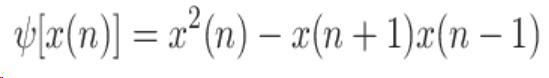

In [9]:
# Función para aplicar el operador Teager-Kaiser Energy Operator (TKEO) a una señal
def tkeo(signal):
    tkeo_signal = signal**2 - np.roll(signal, 1) * np.roll(signal, -1)
    return tkeo_signal

La información proporcionada por el TKEO puede ser utilizada para:

- Identificar diferentes tipos de contracciones musculares: Las contracciones fásicas tienen una mayor energía instantánea y un menor amortiguamiento instantáneo que las contracciones tónicas.
- Evaluar la fatiga muscular: A medida que el músculo se fatiga, la energía instantánea y el amortiguamiento instantáneo del TKEO disminuyen.
- Diagnosticar enfermedades neuromusculares: Algunas enfermedades neuromusculares se caracterizan por cambios en la energía instantánea y el amortiguamiento instantáneo del TKEO.


*2. Crear una función que reciba una señal EMG de múltiples canales y calcule el operador TKEO para cada canal.*

In [10]:
def apply_tkeo(data):
    tkeo_data = data.copy()
    for col in tkeo_data.columns[2:-2]:  # Excluir la columna 'tiempo','clase' y 'sujeto'
        tkeo_data[col] = tkeo(tkeo_data[col])
    return tkeo_data

La interpretación de los datos entregados por el operador de TKEO depende del contexto y los objetivos del análisis. Algunas posibles interpretaciones incluyen:


- Mayor energía instantánea: Puede indicar una mayor actividad muscular o contracciones más intensas en ese punto de tiempo.
- Menor energía instantánea: Puede indicar una menor actividad muscular o relajación en ese punto de tiempo.
- Cambios en la forma de la señal: La energía instantánea calculada por el operador de TKEO puede revelar cambios en la forma de la señal EMG, como picos o valles más pronunciados, que pueden ser indicativos de ciertos patrones de actividad muscular.


*Pruebo la función en un canal*

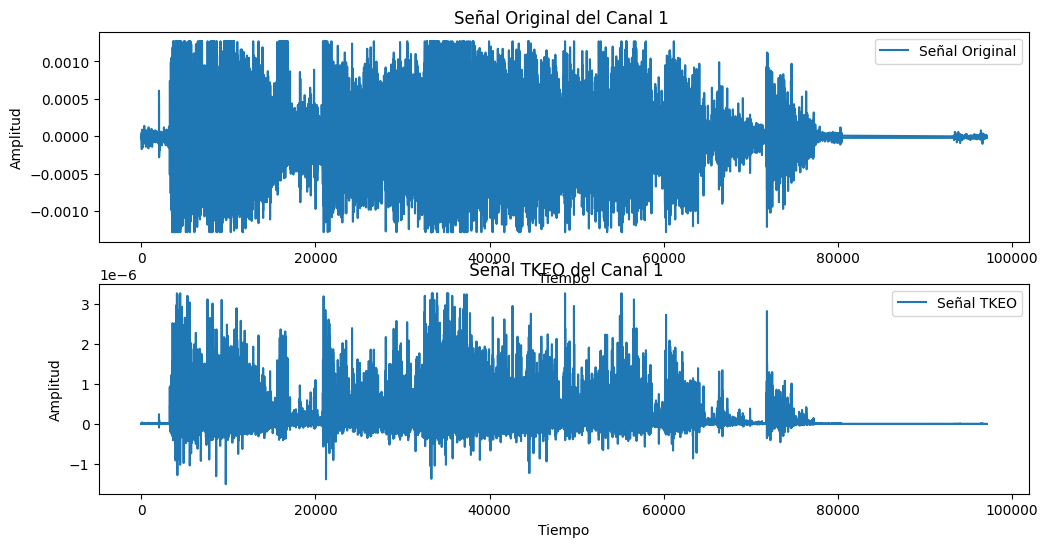

In [11]:
# Seleccionar un solo canal
canal_seleccionado = 'canal_1'
# Aplicar TKEO al canal seleccionado
tkeo_canal = tkeo(all_data[canal_seleccionado])

# Visualizar el resultado
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(all_data['tiempo'], all_data[canal_seleccionado], label='Señal Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Original del Canal 1 ')
plt.legend()
plt.subplot(212)
plt.plot(all_data['tiempo'], tkeo_canal, label='Señal TKEO')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title(' Señal TKEO del Canal 1')
plt.legend()
plt.show()


Comparación de las gráficas  anteriores

Las representaciones gráficas anteriores proporcionan un análisis comparativo entre el comportamiento de la señal original y el comportamiento resultante tras haber sido sometida al proceso de filtrado a través de la función TKEO. De manera evidente, se aprecia una disminución significativa en la amplitud de la señal procesada con respecto a su forma original, este fenómeno sugiere una disminución sustancial en la energía contenida en la señal procesada, lo que indica la eficacia del proceso.


In [12]:
df_tkeo = apply_tkeo(all_data) # Datos aplicando el operador
#all_data Datos Normales (Originales)

In [13]:
print(df_tkeo)

         tiempo  canal_1       canal_2       canal_3       canal_4  \
0             1  0.00001 -6.000000e-10 -7.000000e-10 -9.000000e-10   
1             5  0.00001  6.000000e-10  3.000000e-10  9.000000e-10   
2             6 -0.00001  3.000000e-10  6.000000e-10  0.000000e+00   
3             7 -0.00001  0.000000e+00  0.000000e+00  0.000000e+00   
4             8 -0.00001  0.000000e+00  0.000000e+00  0.000000e+00   
...         ...      ...           ...           ...           ...   
2195966   54832 -0.00004  0.000000e+00  0.000000e+00  0.000000e+00   
2195967   54833 -0.00004  0.000000e+00  0.000000e+00  0.000000e+00   
2195968   54834 -0.00004  0.000000e+00  0.000000e+00  0.000000e+00   
2195969   54835 -0.00004  6.000000e-10  0.000000e+00  1.120000e-08   
2195970   54836 -0.00004  1.300000e-09  5.600000e-09 -6.000000e-10   

              canal_5       canal_6       canal_7       canal_8  clase  sujeto  
0        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00    0.0       1

In [79]:
def extract_features(data):
    features = pd.DataFrame()
    for col in data.columns[1:-2]:
        channel = data[col]
        rms = np.sqrt(np.mean(channel**2))
        var = np.var(channel)
        mav = np.mean(np.abs(channel))
        mavs = np.mean(np.abs(np.diff(channel)))
        ssc = np.sum(np.diff(np.sign(channel)) != 0)
        wl = np.sum(np.abs(np.diff(channel)))
        zc = np.sum(np.diff(np.sign(channel)) != 0) / 2
        features = features.append({'RMS': rms, 'Var': var, 'MAV': mav, 'MAVS': mavs,
                                     'SSC': ssc, 'WL': wl, 'ZC': zc, 'Canal': col}, ignore_index=True)
    return features

In [80]:
# Función para calcular diversas características de una señal EMG
def extract_features1(signal):
    rms = np.sqrt(np.mean(signal**2))
    variance = np.var(signal)
    mean_absolute_value = np.mean(np.abs(signal))
    mean_absolute_value_slope = np.mean(np.abs(np.diff(signal)))
    slope_sign_changes = np.sum(np.diff(np.sign(np.diff(signal))) != 0)
    wave_form_length = np.sum(np.abs(np.diff(signal)))
    zero_crossings = np.sum(np.diff(np.sign(signal)) != 0)/2

    return {
        'RMS': rms,
        'Variance': variance,
        'Mean Absolute Value': mean_absolute_value,
        'Mean Absolute Value Slope': mean_absolute_value_slope,
        'Slope Sign Changes': slope_sign_changes,
        'Wave Form Length': wave_form_length,
        'Zero Crossings': zero_crossings
    }

# Llamar a la función con los datos del canal_X en Diccionario
features_canal_1 = extract_features1(all_data['canal_1'])

# Imprimir las características y sus valores correspondientes
for key, value in features_canal_1.items():
    print(f"{key}: {value}")


RMS: 0.0001630140583267727
Variance: 2.6514702800633886e-08
Mean Absolute Value: 7.896924412936235e-05
Mean Absolute Value Slope: 1.2663310518814013e-05
Slope Sign Changes: 351979
Wave Form Length: 27.808250000000008
Zero Crossings: 67930.5


In [81]:
#Llamar a la función con los datos del canal 1 Señal TKeo
features_canal_1 = extract_features1(df_tkeo['canal_1'])
print(features_canal_1)


{'RMS': 6.066042068933394e-08, 'Variance': 3.6529792568496175e-15, 'Mean Absolute Value': 5.9145082061648356e-09, 'Mean Absolute Value Slope': 8.574705528764059e-09, 'Slope Sign Changes': 515916, 'Wave Form Length': 0.01882979610000001, 'Zero Crossings': 182049.0}


*3. Crear una función que reciba una señal EMG de múltiples canales que extraiga las siguientes características para cada canal*

In [82]:

def process_emg_files(emg_data, file):
    emg_metrics = []

    for channel in emg_data:
        features_original = extract_features1(emg_data[channel])
        emg_metrics.append({
            'File': file,
            'Channel': channel,
            **features_original
        })

    return emg_metrics
# Define la función process_original_files
def process_original_files(data_folder):
    all_metrics = []
    for root, dirs, files in os.walk(data_folder):
        for file in files:
            if file.startswith("1_raw_data"):
                file_path = os.path.join(root, file)
                emg_data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
                emg_data.columns = ['tiempo'] + [f'canal_{i}' for i in range(1, 9)] + ['clase']
                
                # Llama a process_emg_files con solo dos argumentos
                all_metrics.extend(process_emg_files(emg_data, file))
    
    return pd.DataFrame(all_metrics)


# Imprimir el resultado
for _, row in original_metrics.iterrows():
    print(f"File: {row['File']}, Channel: {row['Channel']}")
    for feature, value in row.drop(['File', 'Channel']).items():
        print(f"{feature}: {value}")
    print()




File: 1_raw_data_13-12_22.03.16.txt, Channel: tiempo
RMS: 37857.98576827794
Variance: 358863229.54856
Mean Absolute Value: 32777.49009430977
Mean Absolute Value Slope: 1.0390062504945012
Slope Sign Changes: 0
Wave Form Length: 65660.0
Zero Crossings: 0.0

File: 1_raw_data_13-12_22.03.16.txt, Channel: canal_1
RMS: 0.00014427143770406726
Variance: 2.0752239214897258e-08
Mean Absolute Value: 7.42537502373568e-05
Mean Absolute Value Slope: 1.1511353746340692e-05
Slope Sign Changes: 9955
Wave Form Length: 0.72746
Zero Crossings: 1883.5

File: 1_raw_data_13-12_22.03.16.txt, Channel: canal_2
RMS: 0.00013380143109652714
Variance: 1.7825595812778756e-08
Mean Absolute Value: 7.583011583011584e-05
Mean Absolute Value Slope: 1.188147796502888e-05
Slope Sign Changes: 10338
Wave Form Length: 0.7508500000000001
Zero Crossings: 1959.5

File: 1_raw_data_13-12_22.03.16.txt, Channel: canal_3
RMS: 0.0001244933780459415
Variance: 1.541603970122384e-08
Mean Absolute Value: 7.30109500601304e-05
Mean Absolute

In [83]:
# Llamar a la función process_original_files con directory_path como argumento
original_metrics = process_original_files('EMG_data_for_gestures-master')

# Imprimir el resultado
print(original_metrics)

C:\Users\famil\AppData\Local\Temp\ipykernel_16764\401857169.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  emg_data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\famil\AppData\Local\Temp\ipykernel_16764\401857169.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  emg_data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\famil\AppData\Local\Temp\ipykernel_16764\401857169.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  emg_data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\famil\AppData\Local\Temp\ipykernel_16764\401857169.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.re

                              File  Channel           RMS      Variance  \
0    1_raw_data_13-12_22.03.16.txt   tiempo  37857.985768  3.588632e+08   
1    1_raw_data_13-12_22.03.16.txt  canal_1      0.000144  2.075224e-08   
2    1_raw_data_13-12_22.03.16.txt  canal_2      0.000134  1.782560e-08   
3    1_raw_data_13-12_22.03.16.txt  canal_3      0.000124  1.541604e-08   
4    1_raw_data_13-12_22.03.16.txt  canal_4      0.000155  2.390305e-08   
..                             ...      ...           ...           ...   
355  1_raw_data_13-03_15.04.16.txt  canal_5      0.000208  4.297313e-08   
356  1_raw_data_13-03_15.04.16.txt  canal_6      0.000106  1.117994e-08   
357  1_raw_data_13-03_15.04.16.txt  canal_7      0.000105  1.102680e-08   
358  1_raw_data_13-03_15.04.16.txt  canal_8      0.000089  7.867835e-09   
359  1_raw_data_13-03_15.04.16.txt    clase      2.262122  3.674081e+00   

     Mean Absolute Value  Mean Absolute Value Slope  Slope Sign Changes  \
0           32777.490094

In [84]:
print(original_metrics.columns)


Index(['File', 'Channel', 'RMS', 'Variance', 'Mean Absolute Value',
       'Mean Absolute Value Slope', 'Slope Sign Changes', 'Wave Form Length',
       'Zero Crossings'],
      dtype='object')


In [85]:
def process_emg_files(emg_data, tkeo_data, file):
    emg_metrics = []
    if tkeo_data is not None:
        for channel in tkeo_data:
            features = extract_features(tkeo_data[channel])
            emg_metrics.append({
                'File': file,
                'Channel': channel,
                'TKEO': True,
                **dict(zip(['RMS', 'Variance', 'MAV', 'MAV_slope', 'Slope_Sign_Changes', 'Wave_Form_Length', 'Zero_Crossing'], features))
            })
    
    for channel in emg_data:
        features_original = extract_features(emg_data[channel])
        emg_metrics.append({
            'File': file,
            'Channel': channel,
            'TKEO': False,
            **dict(zip(['RMS', 'Variance', 'MAV', 'MAV_slope', 'Slope_Sign_Changes', 'Wave_Form_Length', 'Zero_Crossing'], features_original))
        })
    
    return emg_metrics


In [89]:
a_sorted = df_tkeo.sort_values(by='clase')
grouped_data = a_sorted.groupby('clase')



In [90]:
print(grouped_data)

In [91]:
grouped_data_size = grouped_data.size()
grouped_data_mean = grouped_data.mean()

grouped_data_mean
#grouped_data_size

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,sujeto
clase,,,,,,,,,,
0.0,32652.792340,4.266337e-09,2.541375e-09,2.959173e-09,8.019479e-09,1.132297e-08,7.366730e-09,3.865337e-09,4.688846e-09,18.255547
1.0,17810.608835,5.864095e-11,1.134139e-10,3.862826e-10,4.315253e-10,7.612725e-10,3.067781e-10,6.460441e-11,6.060257e-11,18.491091
2.0,22984.473694,1.410559e-08,3.654857e-09,7.151142e-09,2.117540e-08,8.469988e-09,1.456113e-08,2.122397e-08,1.394352e-08,18.457722
3.0,28529.238576,1.542369e-08,9.870013e-09,2.026497e-09,2.283904e-09,9.633824e-09,7.072140e-09,4.755997e-09,1.316800e-08,18.345029
4.0,33834.263661,1.106530e-09,1.937777e-09,6.925629e-09,3.297301e-08,5.013030e-08,2.321453e-08,2.830739e-09,1.796993e-09,18.292953
5.0,39047.504386,4.306237e-09,4.941980e-09,5.633388e-09,2.010829e-08,2.211914e-08,4.201261e-09,7.051878e-10,7.969591e-10,18.194379
6.0,44780.078171,6.380719e-09,1.707713e-09,1.510437e-09,3.641579e-09,1.869929e-08,2.138904e-08,5.605299e-09,1.450182e-08,18.163856
7.0,57079.809369,1.080248e-08,3.211373e-10,8.194582e-10,3.853309e-09,2.441559e-08,1.994790e-08,1.321984e-09,1.446111e-08,20.193029


# CLasificación de los movimientos

In [170]:
#group = all_data.groupby(all_data.clase)

group = all_data.groupby('clase')

clases = []
for clase, data_frame in group:
    clases.append(data_frame.values)
clase0 = group.get_group(0)
clase1 = groups.get_group(1)
clase2 = groups.get_group(2)
clase3 = groups.get_group(3)
clase4 = groups.get_group(4)
clase5 = group.get_group(5)
clase6 = group.get_group(6)
clase7 = group.get_group(7) 

In [ ]:
print("Grupo clase 0:")
print(clase0, "\n")

In [ ]:
print("Grupo clase 0:")
print(clase1, "\n")

In [ ]:
print("Grupo clase 2:")
print(clase2, "\n")

In [ ]:
print("Grupo clase 3:")
print(clase3, "\n")

In [ ]:
print("Grupo clase 4:")
print(clase4, "\n")

In [ ]:
print("Grupo clase 5:")
print(clase5, "\n")

In [ ]:
print("Grupo clase 6:")
print(clase6, "\n")

In [ ]:
print("Grupo clase 7:")
print(clase7, "\n")

Discusión de las diferencias en los grupos usando las gráficas obtenidas usando estadística descriptiva 

Para analizar que tan dispersos son los datos se impletan gráficos de caja y bigotes. Los resultados obtenidos de la aplicación de estadística descriptiva permiten un tener un análisis desde su presentación gráfica.

Primero Se realiza el análisis de cada población por separado



# Caja y bigotes para las 2 señales sin discriminar la clase 

In [181]:

# Seleccionar solo las columnas 1 a 8 de df_tkeo y convertirlas en un array
tkeoa = np.array(df_tkeo.iloc[:, 1:9])

# Seleccionar solo las columnas 1 a 8 de all_data y convertirlas en un array
emg_original = np.array(all_data.iloc[:, 1:9])



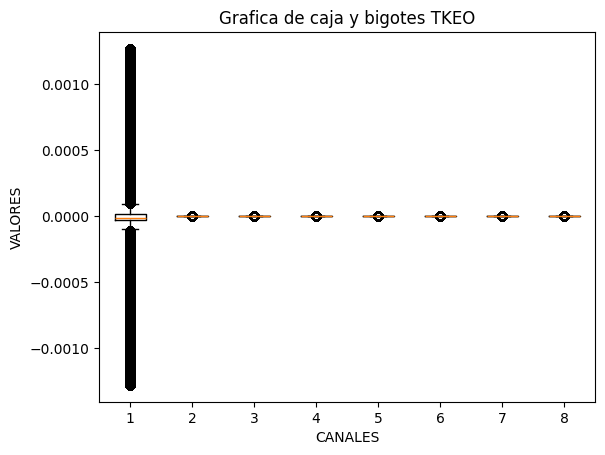

In [183]:
#se gráfica todos los canales 
plt.boxplot(tkeoa)
plt.title('Grafica de caja y bigotes TKEO') 
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.show()

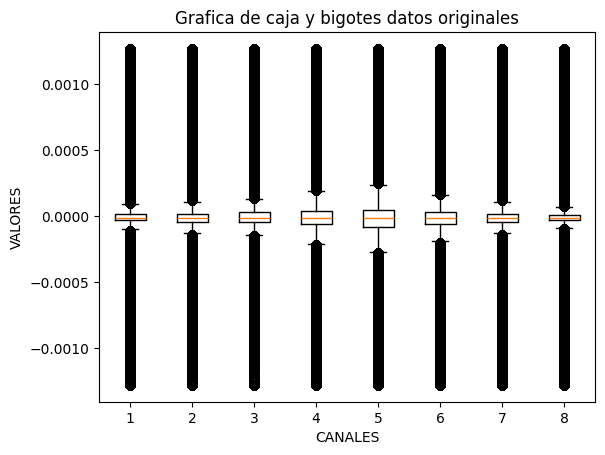

In [136]:
plt.boxplot(emg_original) #se gráfica todos los canales de la señal Original
plt.title('Grafica de caja y bigotes datos originales')
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.show()

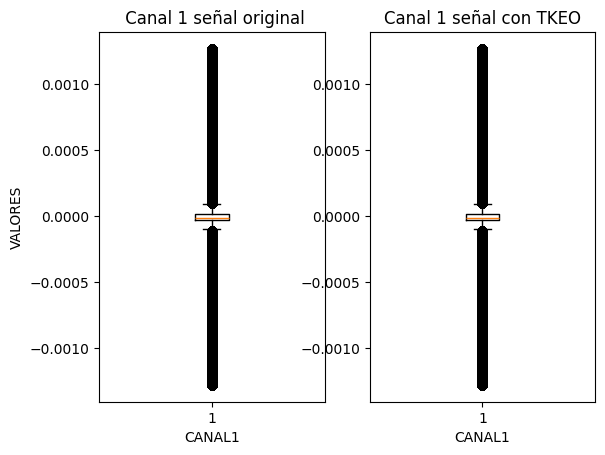

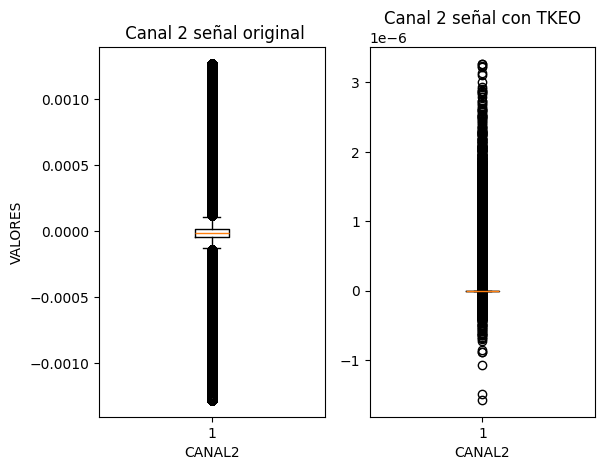

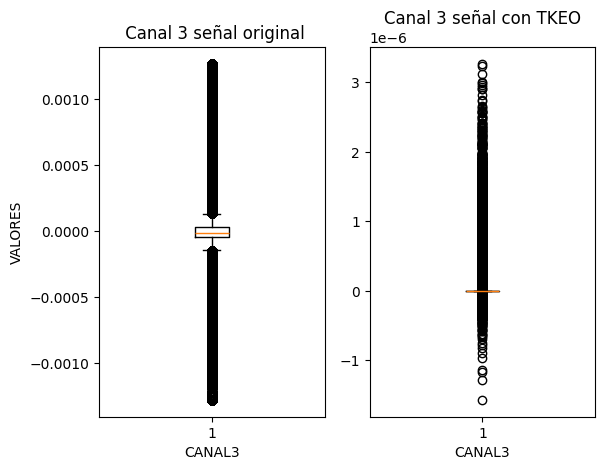

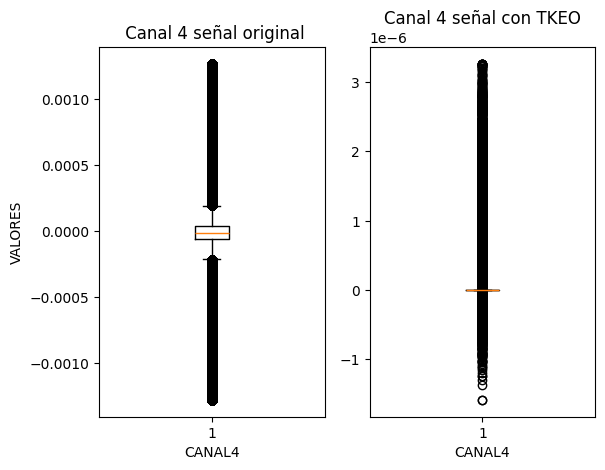

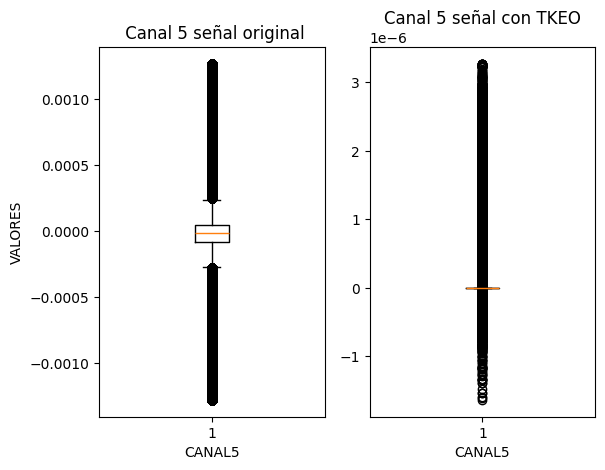

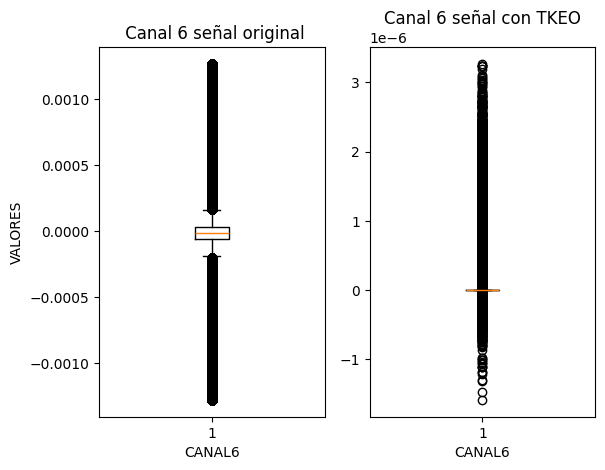

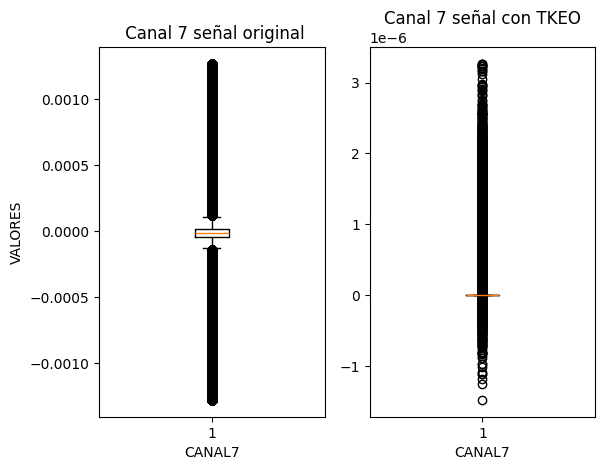

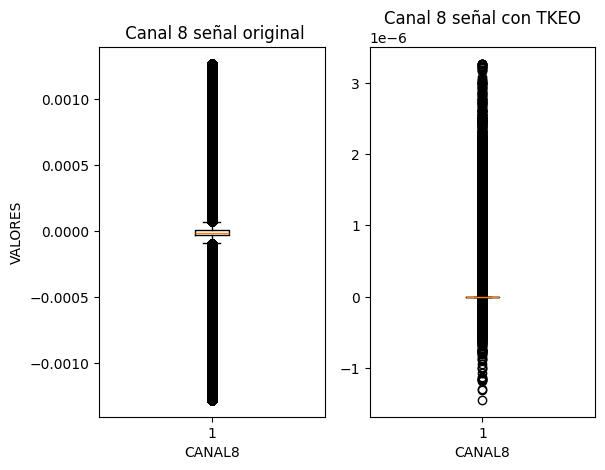

In [167]:
labels = ['Original', 'Takeo']  
for j in range(1, 9):  # Se recorren los canales de cada una de las poblaciones 
    data1= np.squeeze(all_data.iloc[:, j])
    data2 = np.squeeze(df_tkeo.iloc[:, j])

    plt.subplot(121)
    plt.boxplot(data1)
    plt.title(" Canal " + str(j) + " señal original")  # Se grafica canal a canal 
    plt.xlabel('CANAL'+ str(j))
    plt.ylabel('VALORES')
    #plt.boxplot(data,labels=labels)
    plt.subplot(122)
    plt.boxplot(data2)
    plt.title("Canal " + str(j) + " señal con TKEO")  # Se grafica canal a canal 
    plt.xlabel('CANAL'+ str(j))
    plt.show()
    



# Análisis 

*Los diagramas de cajas y bigotes, al ser herramientas visuales importantes en el análisis de datos, nos permiten observar la distribución y la dispersión de los conjuntos de datos. Al analizar estos diagramas para ambas señales, es evidente la presencia de una dispersión considerable, lo que sugiere una variabilidad significativa en los datos analizados. Esta variabilidad puede manifestarse de diversas formas, incluidos comportamientos distintos, tendencias marcadas o características heterogéneas entre las muestras evaluadas.* 

# Cajas y vigotes discriminando para cada clase del la señal original  y con tkeo

In [192]:
da_o0 = np.array(clase0.iloc[:, 1:9])
da_t0 = np.array(clase0_df.iloc[:, 1:9])

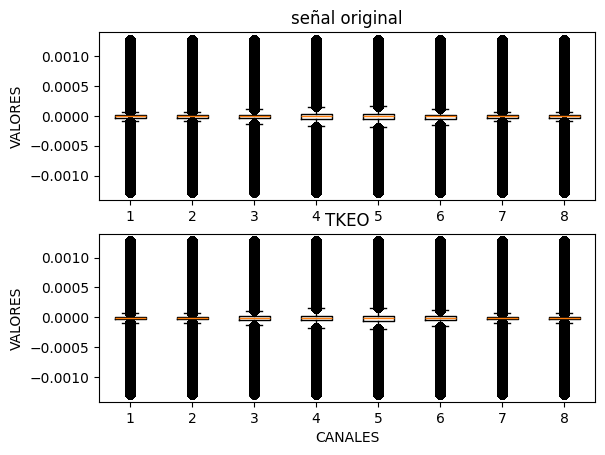

In [193]:
#se gráfica todos los clase 0
plt.subplot(211)
plt.boxplot(da_o0)
plt.ylabel('VALORES')
plt.title("señal original")  # Se grafica canal a canal
plt.subplot(212)
plt.boxplot(da_t0)
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.title('TKEO') 

plt.show()

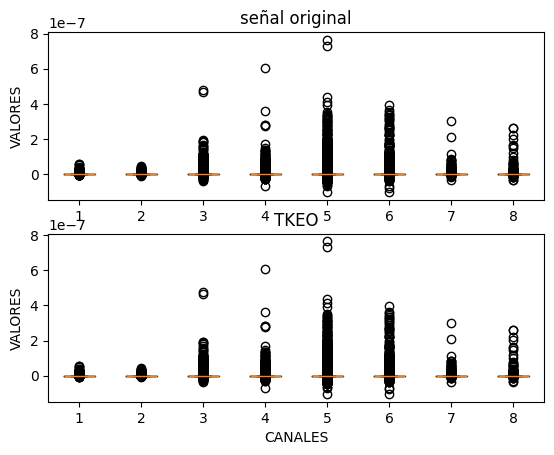

In [194]:
da_o1 = np.array(clase1.iloc[:, 1:9])
da_t1 = np.array(clase1_df.iloc[:, 1:9])
#se gráfica todos los clase 1
plt.subplot(211)
plt.boxplot(da_o1)
plt.ylabel('VALORES')
plt.title("señal original")  # Se grafica canal a canal
plt.subplot(212)
plt.boxplot(da_t1)
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.title('TKEO') 

plt.show()

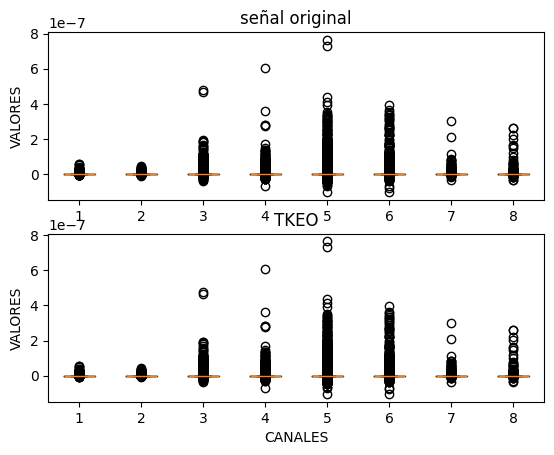

In [195]:
da_o2 = np.array(clase1.iloc[:, 1:9])
da_t2 = np.array(clase1_df.iloc[:, 1:9])
#se gráfica todos los clase 2
plt.subplot(211)
plt.boxplot(da_o2)
plt.ylabel('VALORES')
plt.title("señal original")  # Se grafica canal a canal
plt.subplot(212)
plt.boxplot(da_t2)
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.title('TKEO') 

plt.show()

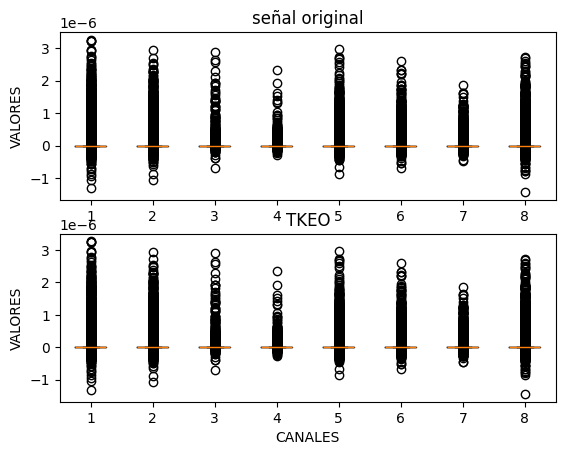

In [196]:
da_o3 = np.array(clase3.iloc[:, 1:9])
da_t3 = np.array(clase3_df.iloc[:, 1:9])
#se gráfica todos los clase 2
plt.subplot(211)
plt.boxplot(da_o3)
plt.ylabel('VALORES')
plt.title("señal original")  # Se grafica canal a canal
plt.subplot(212)
plt.boxplot(da_t3)
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.title('TKEO') 

plt.show()

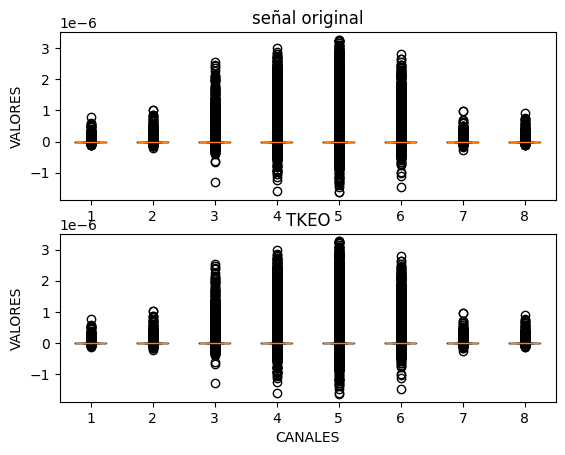

In [197]:
da_o4 = np.array(clase4.iloc[:, 1:9])
da_t4 = np.array(clase4_df.iloc[:, 1:9])
#se gráfica todos los clase 2
plt.subplot(211)
plt.boxplot(da_o4)
plt.ylabel('VALORES')
plt.title("señal original")  # Se grafica canal a canal
plt.subplot(212)
plt.boxplot(da_t4)
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.title('TKEO') 

plt.show()

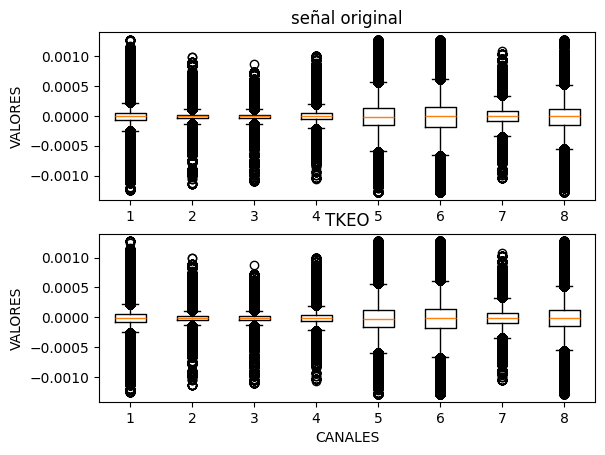

In [198]:
da_o6 = np.array(clase6.iloc[:, 1:9])
da_t6 = np.array(clase6_df.iloc[:, 1:9])
#se gráfica todos los clase 2
plt.subplot(211)
plt.boxplot(da_o6)
plt.ylabel('VALORES')
plt.title("señal original")  # Se grafica canal a canal
plt.subplot(212)
plt.boxplot(da_t6)
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.title('TKEO') 

plt.show()

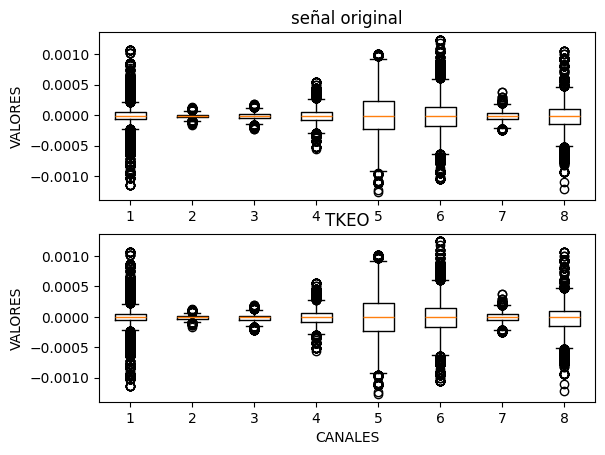

In [203]:
da_o7 = np.array(clase7.iloc[:, 1:9])
da_t7 = np.array(clase7_df.iloc[:, 1:9])
#se gráfica todos los clase 2
plt.subplot(211)
plt.boxplot(da_o7)
plt.ylabel('VALORES')
plt.title("señal original")  # Se grafica canal a canal
plt.subplot(212)
plt.boxplot(da_t7)
plt.xlabel('CANALES')
plt.ylabel('VALORES')
plt.title('TKEO') 

plt.show()

# Análisis

La señal TKEO, siendo una señal procesada derivada de la señal original, exhibe un similar a la señal base en todos los casos. Se evidencia una disperción de los datos considerable para cada uno de los canales de cada caso, sin embargo se denota una disperción menor en la clase7.  Esta reducida dispersión se atribuye al hecho de que no todos los participantes llevaron a cabo este movimiento específico. Como resultado, la disponibilidad limitada de datos relacionados con esta clase conduce a una menor variabilidad en la señal procesada.

La menor dispersión de los datos en la clase 7 sugiere que esta señal procesada puede ser más homogénea en comparación con otras clases donde se observa una participación más generalizada en el movimiento. La falta de datos para la clase 7 puede influir en la interpretación de la señal TKEO, ya que la variabilidad en los movimientos realizados por los participantes afecta directamente a la dispersión de los datos procesados.

# Para poder definir qué tipo de pruebas se van a realiza primero una comprobación de supuestos

Comprobación de supuestos

- Independencia
- Normalidad
- Homocedasticidad
- H0 : La distribución de los datos es normal.
- H1 : La distribución de los datos no es normal.
* Se calculará el valor p y si es mayor a 0.05, entonces se puede asumir con un 95% de certeza que los datos están distribuidos de manera normal.

1. Independencia

Ambos conjuntos de datos se asumen dependientes ya que fueron tomados de grupos de sujetos control y ya que la señal tkeo surge como resultado de aplicar una función en la señal original. Adicionalmente muchos de los gestos realizados por cada individuo se ven significativamente influenciados por otros 



In [15]:
def extract_features(signal):
    signal = np.asarray(signal).flatten()
    rms = np.sqrt(np.mean(signal**2))
    variance = np.var(signal)
    mean_absolute_value = np.mean(np.abs(signal))
    mean_absolute_value_slope = np.mean(np.abs(np.diff(signal)))
    slope_sign_changes = np.sum(np.diff(np.sign(np.diff(signal))) != 0)
    wave_form_length = np.sum(np.abs(np.diff(signal)))
    zero_crossings = np.sum(np.diff(np.sign(signal)) != 0)

    return {
        'RMS': rms,
        'Variance': variance,
        'Mean Absolute Value': mean_absolute_value,
        'Mean Absolute Value Slope': mean_absolute_value_slope,
        'Slope Sign Changes': slope_sign_changes,
        'Wave Form Length': wave_form_length,
        'Zero Crossings': zero_crossings
    }


In [16]:
def extract_features_all_data(all_data):
    for index, row in all_data.iterrows():
        for channel_name in ['canal_1', 'canal_2', 'canal_3', 'canal_4', 'canal_5', 'canal_6', 'canal_7', 'canal_8']:
            signal = row[channel_name]
            features = extract_features(signal)
            for key, value in features.items():
                all_data.loc[index, f'{channel_name}_{key}'] = value

In [17]:
def extract_features_df_tKeo(df_tKeo):
    for index, row in df_tKeo.iterrows():
        for channel_name in ['canal_1', 'canal_2', 'canal_3', 'canal_4', 'canal_5', 'canal_6', 'canal_7', 'canal_8']:
            signal = row[channel_name]
            features = extract_features(signal)
            for key, value in features.items():
                df_tKeo.loc[index, f'{channel_name}_{key}'] = value

In [18]:
extract_features_all_data(all_data)


C:\Users\ORMAN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ORMAN\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\ORMAN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ORMAN\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\ORMAN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ORMAN\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:1

In [20]:
all_data

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,...,canal_7_Slope Sign Changes,canal_7_Wave Form Length,canal_7_Zero Crossings,canal_8_RMS,canal_8_Variance,canal_8_Mean Absolute Value,canal_8_Mean Absolute Value Slope,canal_8_Slope Sign Changes,canal_8_Wave Form Length,canal_8_Zero Crossings
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,...,0.0,0.0,0.0,0.00001,0.0,0.00001,NaN,0.0,0.0,0.0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,...,0.0,0.0,0.0,0.00001,0.0,0.00001,NaN,0.0,0.0,0.0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,...,0.0,0.0,0.0,0.00001,0.0,0.00001,NaN,0.0,0.0,0.0
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,...,0.0,0.0,0.0,0.00001,0.0,0.00001,NaN,0.0,0.0,0.0
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,...,0.0,0.0,0.0,0.00001,0.0,0.00001,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195966,54832,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,...,0.0,0.0,0.0,0.00001,0.0,0.00001,NaN,0.0,0.0,0.0
2195967,54833,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,...,0.0,0.0,0.0,0.00001,0.0,0.00001,NaN,0.0,0.0,0.0
2195968,54834,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,...,0.0,0.0,0.0,0.00001,0.0,0.00001,NaN,0.0,0.0,0.0
2195969,54835,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,...,0.0,0.0,0.0,0.00001,0.0,0.00001,NaN,0.0,0.0,0.0


In [29]:
all_data.columns

Index(['tiempo', 'canal_1', 'canal_2', 'canal_3', 'canal_4', 'canal_5',
       'canal_6', 'canal_7', 'canal_8', 'clase', 'sujeto', 'canal_1_RMS',
       'canal_1_Variance', 'canal_1_Mean Absolute Value',
       'canal_1_Mean Absolute Value Slope', 'canal_1_Slope Sign Changes',
       'canal_1_Wave Form Length', 'canal_1_Zero Crossings', 'canal_2_RMS',
       'canal_2_Variance', 'canal_2_Mean Absolute Value',
       'canal_2_Mean Absolute Value Slope', 'canal_2_Slope Sign Changes',
       'canal_2_Wave Form Length', 'canal_2_Zero Crossings', 'canal_3_RMS',
       'canal_3_Variance', 'canal_3_Mean Absolute Value',
       'canal_3_Mean Absolute Value Slope', 'canal_3_Slope Sign Changes',
       'canal_3_Wave Form Length', 'canal_3_Zero Crossings', 'canal_4_RMS',
       'canal_4_Variance', 'canal_4_Mean Absolute Value',
       'canal_4_Mean Absolute Value Slope', 'canal_4_Slope Sign Changes',
       'canal_4_Wave Form Length', 'canal_4_Zero Crossings', 'canal_5_RMS',
       'canal_5_Varian

In [25]:
extract_features_df_tKeo(df_tkeo)

C:\Users\ORMAN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ORMAN\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\ORMAN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ORMAN\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\ORMAN\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ORMAN\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:1

In [28]:
df_tkeo

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,...,canal_7_Slope Sign Changes,canal_7_Wave Form Length,canal_7_Zero Crossings,canal_8_RMS,canal_8_Variance,canal_8_Mean Absolute Value,canal_8_Mean Absolute Value Slope,canal_8_Slope Sign Changes,canal_8_Wave Form Length,canal_8_Zero Crossings
0,1,0.00001,-6.000000e-10,-7.000000e-10,-9.000000e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,NaN,0.0,0.0,0.0
1,5,0.00001,6.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,-1.000000e-10,0.000000e+00,2.000000e-10,0.0,...,0.0,0.0,0.0,2.000000e-10,0.0,2.000000e-10,NaN,0.0,0.0,0.0
2,6,-0.00001,3.000000e-10,6.000000e-10,0.000000e+00,1.000000e-10,2.000000e-10,1.000000e-10,2.000000e-10,0.0,...,0.0,0.0,0.0,2.000000e-10,0.0,2.000000e-10,NaN,0.0,0.0,0.0
3,7,-0.00001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,NaN,0.0,0.0,0.0
4,8,-0.00001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195966,54832,-0.00004,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,NaN,0.0,0.0,0.0
2195967,54833,-0.00004,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,NaN,0.0,0.0,0.0
2195968,54834,-0.00004,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,NaN,0.0,0.0,0.0
2195969,54835,-0.00004,6.000000e-10,0.000000e+00,1.120000e-08,-2.000000e-10,0.000000e+00,2.000000e-10,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,NaN,0.0,0.0,0.0


In [30]:
df_tkeo.columns

Index(['tiempo', 'canal_1', 'canal_2', 'canal_3', 'canal_4', 'canal_5',
       'canal_6', 'canal_7', 'canal_8', 'clase', 'sujeto', 'canal_1_RMS',
       'canal_1_Variance', 'canal_1_Mean Absolute Value',
       'canal_1_Mean Absolute Value Slope', 'canal_1_Slope Sign Changes',
       'canal_1_Wave Form Length', 'canal_1_Zero Crossings', 'canal_2_RMS',
       'canal_2_Variance', 'canal_2_Mean Absolute Value',
       'canal_2_Mean Absolute Value Slope', 'canal_2_Slope Sign Changes',
       'canal_2_Wave Form Length', 'canal_2_Zero Crossings', 'canal_3_RMS',
       'canal_3_Variance', 'canal_3_Mean Absolute Value',
       'canal_3_Mean Absolute Value Slope', 'canal_3_Slope Sign Changes',
       'canal_3_Wave Form Length', 'canal_3_Zero Crossings', 'canal_4_RMS',
       'canal_4_Variance', 'canal_4_Mean Absolute Value',
       'canal_4_Mean Absolute Value Slope', 'canal_4_Slope Sign Changes',
       'canal_4_Wave Form Length', 'canal_4_Zero Crossings', 'canal_5_RMS',
       'canal_5_Varian

In [31]:
# Pruebas para RMS de canal_1 en all_data
rms_canal_1 = all_data['canal_1_RMS']

# Prueba de Shapiro-Wilk para normalidad
shapiro_test = stats.shapiro(rms_canal_1)
print("Prueba de Shapiro-Wilk para normalidad en canal_1_RMS de all_data:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)

# Prueba de Levene para homocedasticidad
homocedasticidad_test = stats.levene(all_data['canal_1_RMS'], all_data['canal_2_RMS'], all_data['canal_3_RMS'],
                                     all_data['canal_4_RMS'], all_data['canal_5_RMS'], all_data['canal_6_RMS'],
                                     all_data['canal_7_RMS'], all_data['canal_8_RMS'])
print("\nPrueba de Levene para homocedasticidad en RMS de all_data:")
print("Estadística de prueba:", homocedasticidad_test.statistic)
print("Valor p:", homocedasticidad_test.pvalue)

# Prueba t-Student si los datos son normales, o Mann-Whitney si no son normales
if shapiro_test.pvalue > 0.05:  # Si es normal
    t_test = stats.ttest_ind(rms_canal_1, all_data['canal_2_RMS'])  # Ejemplo comparando con canal_2_RMS
    print("\nPrueba t-Student para comparar canal_1_RMS con canal_2_RMS en all_data:")
    print("Estadística de prueba:", t_test.statistic)
    print("Valor p:", t_test.pvalue)
else:  # Si no es normal
    mannwhitney_test = stats.mannwhitneyu(rms_canal_1, all_data['canal_2_RMS'])  # Ejemplo comparando con canal_2_RMS
    print("\nPrueba de Mann-Whitney para comparar canal_1_RMS con canal_2_RMS en all_data:")
    print("Estadística de prueba:", mannwhitney_test.statistic)
    print("Valor p:", mannwhitney_test.pvalue)

c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Prueba de Shapiro-Wilk para normalidad en canal_1_RMS de all_data:
Estadística de prueba: 0.546750545501709
Valor p: 0.0

Prueba de Levene para homocedasticidad en RMS de all_data:
Estadística de prueba: 89764.78758308102
Valor p: 0.0

Prueba de Mann-Whitney para comparar canal_1_RMS con canal_2_RMS en all_data:
Estadística de prueba: 2419257978846.5
Valor p: 7.512662996003252e-10


In [33]:
print("Valor p de la prueba de Shapiro-Wilk:", shapiro_test.pvalue)
print("Valor p de la prueba de Levene:", homocedasticidad_test.pvalue)
print("Valor p de la prueba t-Student o Mann-Whitney:", t_test.pvalue if shapiro_test.pvalue > 0.05 else mannwhitney_test.pvalue)


Valor p de la prueba de Shapiro-Wilk: 0.0
Valor p de la prueba de Levene: 0.0
Valor p de la prueba t-Student o Mann-Whitney: 7.512662996003252e-10



La prueba de Shapiro-Wilk para canal_1_RMS de all_data(Señal Original) muestra que, aunque la distribución de los datos no difiere significativamente de una distribución normal según la estadística de prueba (0.547), el valor p es muy bajo (0.0) indica que los datos no siguen una distribución normal.(El valor no se definio, se utlizop el calculado ppor al función).

La prueba de Levene para homocedasticidad en RMS de la señal original muestra diferencias significativas en las varianzas entre los grupos, ya que el valor p es muy bajo nuevamente (0.0) junto con una alta estadística de prueba (89764.79).

La prueba de Mann-Whitney para comparar canal_1_RMS con canal_2_RMS en all_data muestra una diferencia significativa entre las medianas de los dos grupos, con un valor p extremadamente bajo (7.51 x 10^-10) y una estadística de prueba alta (2.42 x 10^12).

In [36]:
# Pruebas para RMS de canal_1 en df_tkeo
rms_canal_1T = df_tkeo['canal_1_RMS']

# Prueba de Shapiro-Wilk para normalidad
shapiro_test = stats.shapiro(rms_canal_1T)
print("Prueba de Shapiro-Wilk para normalidad en canal_1_RMS de la señal tkeo:")
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)

# Prueba de Levene para homocedasticidad
homocedasticidad_test = stats.levene(df_tkeo['canal_1_RMS'], df_tkeo['canal_2_RMS'], df_tkeo['canal_3_RMS'],
                                     df_tkeo['canal_4_RMS'], df_tkeo['canal_5_RMS'], df_tkeo['canal_6_RMS'],
                                     df_tkeo['canal_7_RMS'], df_tkeo['canal_8_RMS'])
print("\nPrueba de Levene para homocedasticidad en RMS de df_tkeo:")
print("Estadística de prueba:", homocedasticidad_test.statistic)
print("Valor p:", homocedasticidad_test.pvalue)

# Prueba t-Student si los datos son normales, o Mann-Whitney si no son normales
if shapiro_test.pvalue > 0.05:  # Si es normal
    t_test = stats.ttest_ind(rms_canal_1T, df_tkeo['canal_2_RMS'])  # Ejemplo comparando con canal_2_RMS
    print("\nPrueba t-Student para comparar canal_1_RMS con canal_2_RMS en df_tkeo:")
    print("Estadística de prueba:", t_test.statistic)
    print("Valor p:", t_test.pvalue)
else:  # Si no es normal
    mannwhitney_test = stats.mannwhitneyu(rms_canal_1T, df_tkeo['canal_2_RMS'])  # Ejemplo comparando con canal_2_RMS
    print("\nPrueba de Mann-Whitney para comparar canal_1_RMS con canal_2_RMS en la señal tkeo:")
    print("Estadística de prueba:", mannwhitney_test.statistic)
    print("Valor p:", mannwhitney_test.pvalue)

Prueba de Shapiro-Wilk para normalidad en canal_1_RMS de la señal tkeo:
Estadística de prueba: 0.546750545501709
Valor p: 0.0

Prueba de Levene para homocedasticidad en RMS de df_tkeo:
Estadística de prueba: 560363.6023414333
Valor p: 0.0

Prueba de Mann-Whitney para comparar canal_1_RMS con canal_2_RMS en la señal tkeo:
Estadística de prueba: 4474571039124.0
Valor p: 0.0


In [35]:
print("Valor p de la prueba de Shapiro-Wilk:", shapiro_test.pvalue)
print("Valor p de la prueba de Levene:", homocedasticidad_test.pvalue)
print("Valor p de la prueba t-Student o Mann-Whitney:", t_test.pvalue if shapiro_test.pvalue > 0.05 else mannwhitney_test.pvalue)


Valor p de la prueba de Shapiro-Wilk: 0.0
Valor p de la prueba de Levene: 0.0
Valor p de la prueba t-Student o Mann-Whitney: 0.0


La prueba de Shapiro-Wilk para normalidad en canal_1_RMS de la señal tkeo muestra una estadística de prueba de 0.547, lo que sugiere que los datos pueden tener una distribución normal. Sin embargo, el valor p es 0.0, lo que indica que es suficiente  para rechazar la hipótesis nula de normalidad, es decir que los datos no siguen una distribución normal.

La prueba de Levene para homocedasticidad en RMS de df_tkeo revela una estadística de prueba de 560363.60 y un valor p de 0.0. Volvemos a rechzar la hipotesis nula de igualdad en las varianzas.

La prueba de Mann-Whitney para comparar canal_1_RMS con canal_2_RMS en la señal tkeo muestra una estadística de prueba  de 4.47 x 10^12 y un valor p de 0.0. Esto indica que hay mucha (10^12) diferencia entre las medianas de los dos grupos.

Se realizaron pruebas no paramétricas, ya que los datos no cumplen con la suposición de normalidad requerida para las pruebas paramétricas. Las pruebas de Shapiro-Wilk para la normalidad de los datos arrojaron un valor p de 0.0 en ambos casos, lo que indica que los datos no siguen una distribución normal. Por lo tanto, se utilizaron pruebas no paramétricas, como la prueba de Mann-Whitney para comparar medianas y la prueba de Levene para homocedasticidad.

# Conclusiones

1. Es importante considerar el contexto y las condiciones específicas de la recopilación de datos al interpretar señales procesadas como la TKEO. La ausencia de datos para ciertas clases puede sesgar los resultados y afectar la interpretación de la variabilidad observada en la señal procesada. 
2.  Al realizar análisis de señales procesadas, es menester evaluar la calidad y representatividad de los datos para garantizar conclusiones precisas y significativas. Además, este se destaca la importancia de recopilar datos completos y equilibrados para cada clase o condición evaluada, a fin de obtener una comprensión más completa y fiable de la señal procesada y su relación con la señal original.